In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data-2019.csv')
df.head(5)

,Country,Region,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
0,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
1,Albania,Central and Eastern Europe,107,4.719,0.947,0.848,0.874,0.383,0.027,0.178
2,Algeria,Middle East and Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.114,0.073
3,Argentina,Latin America and Caribbean,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066
4,Armenia,Central and Eastern Europe,116,4.559,0.850,1.055,0.815,0.283,0.064,0.095


In [23]:
# top 10 happiest & unhappiest coountries

df_sorted = df[['Country','Rank 2019']].sort_values(by='Rank 2019', ascending=True)
print('top 10 happiest countries:')
print(df_sorted.head(10).set_index('Country'))
print('\ntop 10 unhappiest countries:')
print(df_sorted.tail(10).set_index('Country'))

top 10 happiest countries:
             Rank 2019
Country               
Finland              1
Denmark              2
Norway               3
Iceland              4
Netherlands          5
Switzerland          6
Sweden               7
New Zealand          8
Canada               9
Austria             10

top 10 unhappiest countries:
                          Rank 2019
Country                            
Haiti                           147
Botswana                        148
Syria                           149
Malawi                          150
Yemen                           151
Rwanda                          152
Tanzania                        153
Afghanistan                     154
Central African Republic        155
South Sudan                     156


In [24]:
print(df['Country'].unique().shape)
print(df.shape)

(156,)
(156, 10)


<Axes: xlabel='Score 2019', ylabel='Count'>

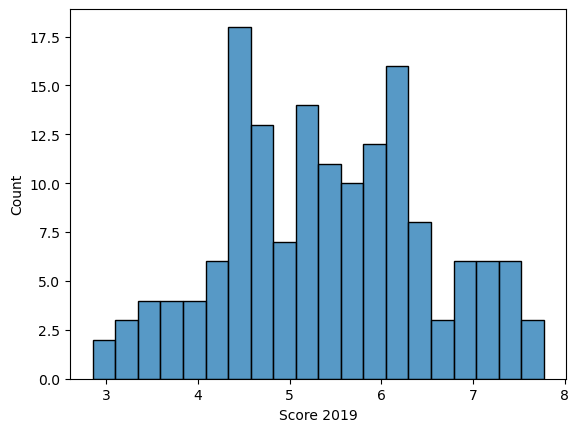

In [25]:
# check distribution of countries by happiness score:
df['count'] = 1
sns.histplot(data=df, x='Score 2019', bins=20)

In [26]:
df = df.drop(['count'], axis=1)
df.dtypes

Country                  object
Region                   object
Rank 2019                 int64
Score 2019              float64
GDP 2019                float64
Family 2019             float64
Life Expectancy 2019    float64
Freedom 2019            float64
Trust 2019              float64
Generosity 2019         float64
dtype: object

/var/folders/dx/pp3spqf900dcrbfw4fvwvy440000gn/T/ipykernel_74176/593971231.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



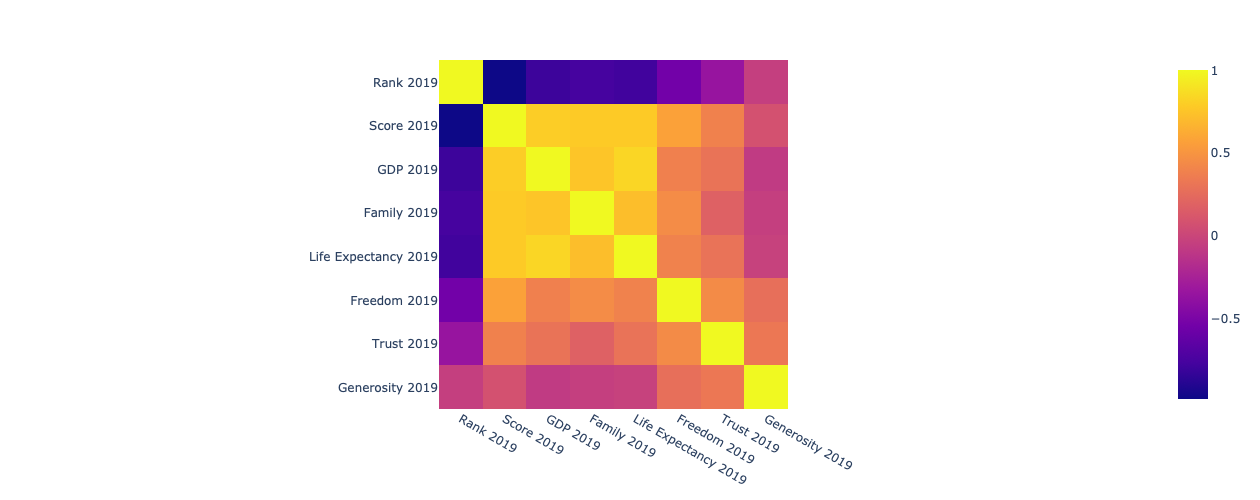

In [31]:
#make a correlation matrics with heatmap:
corr = df.corr()
fig = px.imshow(corr)
fig.layout.height = 500
fig.layout.width = 1000
fig.show()

              indicator        avg      bg       diff
0             Rank 2019  78.500000  97.000  23.566879
1            Score 2019   5.407096   5.011  -7.325488
2              GDP 2019   0.905147   1.092  20.643329
3           Family 2019   1.208814   1.513  25.163993
4  Life Expectancy 2019   0.725244   0.815  12.376036
5          Freedom 2019   0.392571   0.311 -20.778563
6            Trust 2019   0.110603   0.004 -96.383447
7       Generosity 2019   0.184846   0.081 -56.179775


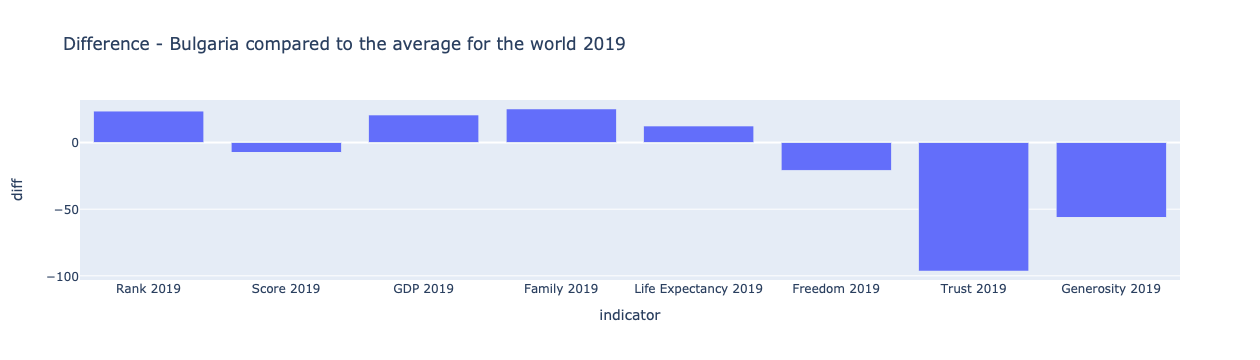

In [125]:
df_mean = df.describe().loc['mean'].reset_index()
df_bg = df.loc[df['Country'] == 'Bulgaria'].drop(columns=['Country','Region']).T.reset_index()
merged_df = pd.merge(df_mean, df_bg, how='left', on='index')
merged_df.columns=['indicator', 'avg', 'bg']
merged_df['diff'] = (merged_df['bg'] - merged_df['avg'])/merged_df['avg']*100
print(merged_df)
fig = px.bar(merged_df, x='indicator', y='diff', title="Difference - Bulgaria compared to the average for the world 2019")
fig.show()


In [41]:
df_cntreeu = df.loc[df['Region'] == 'Central and Eastern Europe']
df_cntreeu.sort_values(by='Score 2019', ascending=False)

,Country,Region,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
35,Czech Republic,Central and Eastern Europe,20,6.852,1.269,1.487,0.920,0.457,0.036,0.046
123,Slovakia,Central and Eastern Europe,38,6.198,1.246,1.504,0.881,0.334,0.014,0.121
112,Poland,Central and Eastern Europe,40,6.182,1.206,1.438,0.884,0.483,0.050,0.117
150,Uzbekistan,Central and Eastern Europe,41,6.174,0.745,1.529,0.756,0.631,0.240,0.322
80,Lithuania,Central and Eastern Europe,42,6.149,1.238,1.515,0.818,0.291,0.042,0.043
124,Slovenia,Central and Eastern Europe,44,6.118,1.258,1.523,0.953,0.564,0.057,0.144
71,Kosovo,Central and Eastern Europe,46,6.100,0.882,1.232,0.758,0.489,0.006,0.262
115,Romania,Central and Eastern Europe,48,6.070,1.162,1.232,0.825,0.462,0.005,0.083
75,Latvia,Central and Eastern Europe,53,5.940,1.187,1.465,0.812,0.264,0.064,0.075
41,Estonia,Central and Eastern Europe,55,5.893,1.237,1.528,0.874,0.495,0.161,0.103


In [52]:
df_grouped = df.groupby(by='Region').mean()
df_grouped

/var/folders/dx/pp3spqf900dcrbfw4fvwvy440000gn/T/ipykernel_74176/4047122730.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
Region,,,,,,,,
Australia and New Zealand,9.500000,7.267500,1.337500,1.552500,1.031000,0.571000,0.335000,0.331000
Central and Eastern Europe,70.733333,5.566733,1.029133,1.335900,0.817267,0.359500,0.065100,0.144333
Eastern Asia,64.833333,5.688833,1.235167,1.333500,0.953333,0.372167,0.119667,0.172833
Latin America and Caribbean,52.000000,5.942550,0.908950,1.332850,0.816800,0.438500,0.074850,0.142600
Middle East and Northern Africa,84.894737,5.237000,1.059053,1.148684,0.751053,0.317947,0.105000,0.153474
North America,14.000000,7.085000,1.399000,1.481000,0.956500,0.519000,0.218000,0.282500
Southeastern Asia,89.166667,5.202167,0.850500,1.253667,0.726000,0.550000,0.077667,0.280167
Southern Asia,104.200000,4.793800,0.781900,1.060400,0.667100,0.429800,0.129900,0.267800
Sub-Saharan Africa,122.707317,4.346195,0.462951,0.930341,0.415000,0.341049,0.092585,0.187659
